In [32]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [21]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
logistic = LogisticRegression(max_iter=10000, tol=0.01)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [22]:
# Get the dataset
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [23]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}

In [27]:
# Prepare the grid search object using defined pipeline
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 64}


In [29]:
print(f"Best parameter (CV score={search.best_score_:0.3f}):")
print(search.best_params_)

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 64}


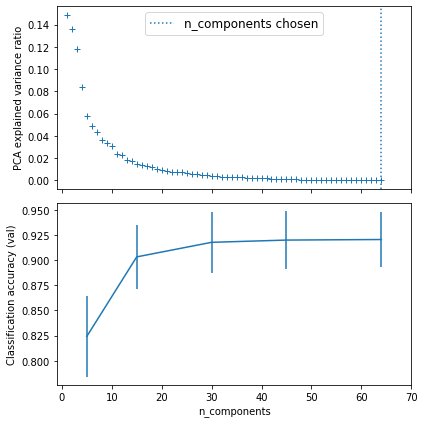

In [30]:
# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'First three PCA directions')

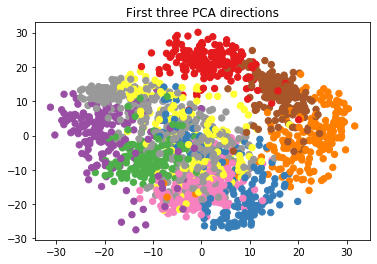

In [44]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
X_reduced = PCA(n_components=3).fit_transform(X_digits)


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_digits, s=40, cmap='Set1')
plt.title("First three PCA directions")


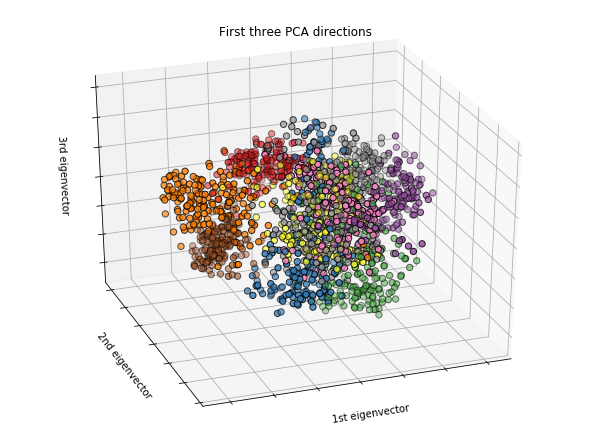

In [43]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_digits, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

/Users/jean.metz/miniconda/envs/ml-laboratory/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


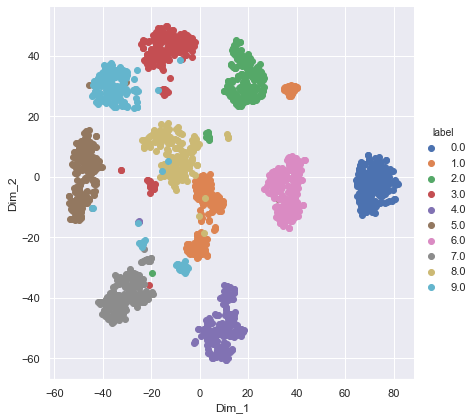

In [52]:
from sklearn.manifold import TSNE
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

# Picking the top 1000 points as TSNE takes a lot of time for 15K points

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(X_digits)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_digits)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
